In [23]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [24]:
weather = pd.read_csv('git-ignore/weather.csv')

Weather data from 5/1/2007 to 10/31/2014, ~7 years.<br><b><font color = "red">If you're looking to just get the CSV, run every cell until past the scatter matrix. I was doing EDA until the very end.

In [25]:
weather = weather[["Station", "Date", "Tmax", "Tmin", "Tavg", "DewPoint", 
                   "WetBulb", "CodeSum", "SnowFall", "PrecipTotal", "StnPressure", 
                   "SeaLevel", "ResultSpeed", "ResultDir", "AvgSpeed"]]

In [68]:
min(weather['Date'])

'2007-05-01'

In [69]:
max(weather['Date'])

'2014-10-31'

In [26]:
weather.head()

,Station,Date,Tmax,Tmin,Tavg,DewPoint,WetBulb,CodeSum,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
0,1,2007-05-01,83,50,67,51,56,,0.0,0.00,29.10,29.82,1.7,27,9.2
1,2,2007-05-01,84,52,68,51,57,,M,0.00,29.18,29.82,2.7,25,9.6
2,1,2007-05-02,59,42,51,42,47,BR,0.0,0.00,29.38,30.09,13.0,4,13.4
3,2,2007-05-02,60,43,52,42,47,BR HZ,M,0.00,29.44,30.08,13.3,2,13.4
4,1,2007-05-03,66,46,56,40,48,,0.0,0.00,29.39,30.12,11.7,7,11.9


Station 1: CHICAGO O'HARE INTERNATIONAL AIRPORT Lat: 41.995 Lon: -87.933 Elev: 662 ft. above sea level<br>
Station 2: CHICAGO MIDWAY INTL ARPT Lat: 41.786 Lon: -87.752 Elev: 612 ft. above sea level

In [27]:
weather['Lat'] = [41.995 if s == 1 else 41.786 for s in weather["Station"]]
weather['Long'] = [-87.933 if s == 1 else -87.752 for s in weather["Station"]]

Will want to eliminate "T"s and "M"s. Trace means non-accumulateable (.01).

In [28]:
missing_snow = weather[weather["SnowFall"]=="M"]
missing_snow[missing_snow["Tmin"] <33]

,Station,Date,Tmax,Tmin,Tavg,DewPoint,WetBulb,CodeSum,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed,Lat,Long
729,2,2008-10-28,45,32,39,23,33,,M,0.00,29.60,30.31,9.9,30,10.3,41.786,-87.752
1063,2,2009-10-11,45,29,37,23,33,,M,0.00,29.67,30.36,1.1,1,4.8,41.786,-87.752
2557,2,2013-10-22,41,31,36,31,35,RA DZ BR,M,0.03,29.28,29.97,4.6,26,5.4,41.786,-87.752
2559,2,2013-10-23,46,32,39,27,34,RA SN,M,T,29.32,30.00,9.2,29,9.2,41.786,-87.752
2563,2,2013-10-25,51,29,40,26,36,,M,0.00,29.57,30.28,10.4,23,11.3,41.786,-87.752
2567,2,2013-10-27,55,32,44,29,38,,M,0.00,29.37,30.05,6.4,23,6.7,41.786,-87.752


In [29]:
missing_rain = weather[weather["PrecipTotal"]=="M"]
missing_rain.sort_values("CodeSum", ascending=True)

,Station,Date,Tmax,Tmin,Tavg,DewPoint,WetBulb,CodeSum,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed,Lat,Long
117,2,2007-06-28,73,61,67,56,61,,M,M,29.43,30.07,12.2,2,13.3,41.786,-87.752
119,2,2007-06-29,71,56,64,56,60,,M,M,29.47,30.11,7.4,2,8.2,41.786,-87.752


In [30]:
weather["Tmax"].dtype

dtype('int64')

In [31]:
weather["Tmin"].dtype

dtype('int64')

In [32]:
weather[weather["Tavg"] == 'M']

,Station,Date,Tmax,Tmin,Tavg,DewPoint,WetBulb,CodeSum,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed,Lat,Long
7,2,2007-05-04,78,51,M,42,50,,M,0.00,29.36,30.04,10.1,7,10.4,41.786,-87.752
505,2,2008-07-08,86,46,M,68,71,TS RA,M,0.28,29.16,29.80,7.4,24,8.3,41.786,-87.752
675,2,2008-10-01,62,46,M,41,47,,M,0.00,29.30,29.96,10.9,33,11.0,41.786,-87.752
1637,2,2011-07-22,100,71,M,70,74,TS TSRA BR,M,0.14,29.23,29.86,3.8,10,8.2,41.786,-87.752
2067,2,2012-08-22,84,72,M,51,61,,M,0.00,29.39,M,4.7,19,M,41.786,-87.752
2211,2,2013-05-02,71,42,M,39,45,,M,0.00,29.51,30.17,15.8,2,16.1,41.786,-87.752
2501,2,2013-09-24,91,52,M,48,54,,M,0.00,29.33,30.00,5.8,9,7.7,41.786,-87.752
2511,2,2013-09-29,84,53,M,48,54,RA BR,M,0.22,29.36,30.01,6.3,36,7.8,41.786,-87.752
2525,2,2013-10-06,76,48,M,44,50,RA DZ BR,M,0.06,29.10,29.76,10.1,25,10.6,41.786,-87.752
2579,2,2014-05-02,80,47,M,43,47,RA,M,0.04,29.10,29.79,10.7,23,11.9,41.786,-87.752


In [33]:
for i, row in weather.iterrows(): #change Tavg
    if row["Tavg"] == "M":
        weather.loc[i, 'Tavg'] = int(((weather.loc[i, 'Tmin'] + weather.loc[i, 'Tmax'])/2))

How to classify M's and T's:<br>
<b>Snowfall M's</b>
- If MinT is >33, M = 0
- If AvgT is >~33 and Precip is .01, then M = .01
- If blank CodeSum and MinT<33, check the other station. M = whatever the other station says.
- If M's still exist, predict using linear regression.<br><Br>

In [34]:
weather.loc[weather["SnowFall"].str.contains("T"), 'SnowFall'] = .01
weather.loc[weather["PrecipTotal"].str.contains("T"), 'PrecipTotal'] = .01

for col in ['Tmax', 'Tmin', 'Tavg']:
    if weather[col].dtype == 'O': # if it's an object it contains non-numeric data
        weather[col] = weather[col].astype(float)
        
#turn all Missing SnowFall values to 0 if it isn't cold enough to snow.
weather.loc[(weather['Tmin'] > 33) & (weather['SnowFall'] == 'M'), 'SnowFall'] = 0 

weather.loc[(weather['Tavg'] <= 33) & (weather['PrecipTotal'] == 0.01) & (weather['SnowFall'] =="M"), 'SnowFall'] = 0.01
for i, row in weather.iterrows():
    #SnowFall - check other weather station if CodeSum is blank
    if row['SnowFall'] == 'M' and row['CodeSum'] == ' ' and row['Tmin'] < 33:
        if row['Station'] == 1: # if Missing Snowfall, check other weather station. (4 records)
            weather.loc[i, 'SnowFall'] = weather.loc[(weather['Date'] == row['Date']) & (weather['Station'] == 2), 
                                                    'SnowFall'].item()
        else:
            weather.loc[i, 'SnowFall'] = weather.loc[(weather['Date'] == row['Date']) & (weather['Station'] == 1), 
                                                   'SnowFall'].item()
    #Precip - check other weather station if CodeSum is blank (2 records)
    if row['PrecipTotal'] == 'M' and row['CodeSum'] == ' ':
        if row['Station'] == 1: # if Missing Precip, check other weather station.
            weather.loc[i, 'PrecipTotal'] = weather.loc[(weather['Date'] == row['Date']) & (weather['Station'] == 2), 
                                                        'PrecipTotal'].item()
        else:
            weather.loc[i, 'PrecipTotal'] = weather.loc[(weather['Date'] == row['Date']) & (weather['Station'] == 1), 
                                                'PrecipTotal'].item()

wow i am a loc master after this.

In [35]:
len(weather[weather['SnowFall'] == 'M'])

6

^^ All 6 of these are in very cold temperatures; Precipitation likely not going to affect mosquito breeding at these temperatures, as it will likely not be occuring. Can fill in blank CodeSum with SnowFall = 0, can fill in "SN" CodeSum with SnowFall = .02.

In [36]:
weather.loc[(weather['Tmin'] > 33) & (weather['SnowFall'] == 'M'), 'SnowFall'] = 0 

In [37]:
for i, row in weather.iterrows(): #change Tavg
    if row["SnowFall"] == "M":
        if "SN" in row["CodeSum"]:
            weather.loc[i, 'SnowFall'] = .02
        else:
            weather.loc[i, 'SnowFall'] = 0

In [38]:
weather.columns

Index(['Station', 'Date', 'Tmax', 'Tmin', 'Tavg', 'DewPoint', 'WetBulb',
       'CodeSum', 'SnowFall', 'PrecipTotal', 'StnPressure', 'SeaLevel',
       'ResultSpeed', 'ResultDir', 'AvgSpeed', 'Lat', 'Long'],
      dtype='object')

Ok let's check for missing values in the rest of our data. Is WetBulb even important? I guess if we want to derive humidity... It's only 4 records.

<i>The <b>wet-bulb temperature</b> is the lowest temperature which may be achieved by evaporative cooling of a water-wetted (or even ice-covered), ventilated surface.</i><br><Br>
A quick technique that many forecasters use to determine the wet-bulb temperature is called the "1/3 rule". The technique is to first find the dewpoint depression (temperature minus dewpoint). Then take this number and divide by 3. Subtract this number from the temperature. You now have an approximation for the wet-bulb temperature.<br><br>http://www.theweatherprediction.com/habyhints/170/

In [39]:
weather[weather["WetBulb"] == "M"]

,Station,Date,Tmax,Tmin,Tavg,DewPoint,WetBulb,CodeSum,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed,Lat,Long
848,1,2009-06-26,86,69,78.0,60,M,,0.0,0.00,M,29.85,6.4,4,8.2,41.995,-87.933
2410,1,2013-08-10,81,64,73.0,57,M,,0.0,0.00,M,30.08,5.3,5,6.5,41.995,-87.933
2412,1,2013-08-11,81,60,71.0,61,M,RA,0.0,0.01,29.35,30.07,2.0,27,3.0,41.995,-87.933
2415,2,2013-08-12,85,69,77.0,63,M,RA,0,0.66,29.27,29.92,4.5,26,7.7,41.786,-87.752


In [40]:
for i, row in weather.iterrows(): #change WetBulb (4 records)
    if row["WetBulb"] == "M":
        weather.loc[i, 'WetBulb'] = int(weather.loc[i,'Tavg']-((weather.loc[i, 'Tavg'] - weather.loc[i, 'DewPoint'])/3))

In [41]:
weather[weather["StnPressure"] == "M"]

,Station,Date,Tmax,Tmin,Tavg,DewPoint,WetBulb,CodeSum,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed,Lat,Long
87,2,2007-06-13,86,68,77.0,53,62,,0,0.00,M,M,7.0,5,M,41.786,-87.752
848,1,2009-06-26,86,69,78.0,60,72,,0.0,0.00,M,29.85,6.4,4,8.2,41.995,-87.933
2410,1,2013-08-10,81,64,73.0,57,67,,0.0,0.00,M,30.08,5.3,5,6.5,41.995,-87.933
2411,2,2013-08-10,81,68,75.0,55,63,,0,0.00,M,30.07,6.0,6,7.4,41.786,-87.752


In [42]:
weather[weather["SeaLevel"]=="M"]

,Station,Date,Tmax,Tmin,Tavg,DewPoint,WetBulb,CodeSum,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed,Lat,Long
87,2,2007-06-13,86,68,77.0,53,62,,0,0.00,M,M,7.0,5,M,41.786,-87.752
832,1,2009-06-18,80,61,71.0,63,67,RA BR,0.0,0.12,29.08,M,6.7,16,7.9,41.995,-87.933
994,1,2009-09-07,77,59,68.0,59,62,BR,0.0,0.00,29.39,M,5.8,3,4.0,41.995,-87.933
1732,1,2011-09-08,75,57,66.0,53,59,RA,0.0,0.01,29.34,M,13.0,2,13.4,41.995,-87.933
1745,2,2011-09-14,60,48,54.0,45,51,RA BR HZ FU,0,0.01,29.47,M,6.0,32,M,41.786,-87.752
1756,1,2011-09-20,74,49,62.0,54,58,MIFG BCFG BR,0.0,0.00,29.26,M,7.3,18,7.3,41.995,-87.933
2067,2,2012-08-22,84,72,78.0,51,61,,0,0.00,29.39,M,4.7,19,M,41.786,-87.752
2090,1,2012-09-03,88,71,80.0,70,73,BR,0.0,0.00,29.17,M,4.6,6,4.4,41.995,-87.933
2743,2,2014-07-23,76,64,70.0,56,61,,0,0.00,29.47,M,16.4,2,16.7,41.786,-87.752


In [43]:
weather['AvgSpeed'].dtype

dtype('O')

In [44]:
weather[weather['AvgSpeed'].str.contains(r'[A-Za-z]')]

,Station,Date,Tmax,Tmin,Tavg,DewPoint,WetBulb,CodeSum,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed,Lat,Long
87,2,2007-06-13,86,68,77.0,53,62,,0,0.00,M,M,7.0,5,M,41.786,-87.752
1745,2,2011-09-14,60,48,54.0,45,51,RA BR HZ FU,0,0.01,29.47,M,6.0,32,M,41.786,-87.752
2067,2,2012-08-22,84,72,78.0,51,61,,0,0.00,29.39,M,4.7,19,M,41.786,-87.752


In [45]:
weather[weather["AvgSpeed"]=="M"]

,Station,Date,Tmax,Tmin,Tavg,DewPoint,WetBulb,CodeSum,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed,Lat,Long
87,2,2007-06-13,86,68,77.0,53,62,,0,0.00,M,M,7.0,5,M,41.786,-87.752
1745,2,2011-09-14,60,48,54.0,45,51,RA BR HZ FU,0,0.01,29.47,M,6.0,32,M,41.786,-87.752
2067,2,2012-08-22,84,72,78.0,51,61,,0,0.00,29.39,M,4.7,19,M,41.786,-87.752


Okay so for columns StnPressure, SeaLevel, and AvgSpeed (~16 records; did not check for dups) we need to fill in values.<br><b>Q:</b> Does linear interpolation make sense?<br><b>A:</b> Not exactly, pulling from the other station would be better.

In [46]:
weather[['Date', 'PrecipTotal', 'StnPressure', 'SeaLevel', 'AvgSpeed']].head(16)

,Date,PrecipTotal,StnPressure,SeaLevel,AvgSpeed
0,2007-05-01,0.00,29.10,29.82,9.2
1,2007-05-01,0.00,29.18,29.82,9.6
2,2007-05-02,0.00,29.38,30.09,13.4
3,2007-05-02,0.00,29.44,30.08,13.4
4,2007-05-03,0.00,29.39,30.12,11.9
5,2007-05-03,0.00,29.46,30.12,13.2
6,2007-05-04,0.01,29.31,30.05,10.8
7,2007-05-04,0.00,29.36,30.04,10.4
8,2007-05-05,0.01,29.40,30.10,12.0
9,2007-05-05,0.01,29.46,30.09,11.5


In [47]:
for i, row in weather.iterrows():
    for col in ["StnPressure", "SeaLevel", "AvgSpeed"]:
        if row[col] == 'M':
            if row['Station'] == 1: # if Missing Snowfall, check other weather station. (4 records)
                weather.loc[i, col] = weather.loc[(weather['Date'] == row['Date']) & (weather['Station'] == 2), 
                                                        col].item()
            else:
                weather.loc[i, col] = weather.loc[(weather['Date'] == row['Date']) & (weather['Station'] == 1), 
                                                   col].item()

Still leaves 2 missing values; both stations do not have a station pressure. For this we will interpolate.

In [48]:
weather[weather["StnPressure"] == "M"]

,Station,Date,Tmax,Tmin,Tavg,DewPoint,WetBulb,CodeSum,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed,Lat,Long
2410,1,2013-08-10,81,64,73.0,57,67,,0.0,0.00,M,30.08,5.3,5,6.5,41.995,-87.933
2411,2,2013-08-10,81,68,75.0,55,63,,0,0.00,M,30.07,6.0,6,7.4,41.786,-87.752


In [49]:
weather[weather["Date"] == "2013-08-09"]

,Station,Date,Tmax,Tmin,Tavg,DewPoint,WetBulb,CodeSum,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed,Lat,Long
2408,1,2013-08-09,82,59,71.0,60,65,,0.0,0.01,29.28,29.98,4.7,27,5.3,41.995,-87.933
2409,2,2013-08-09,84,62,73.0,58,65,,0,0.00,29.34,29.97,4.9,27,5.6,41.786,-87.752


In [50]:
weather[weather["Date"] == "2013-08-11"]

,Station,Date,Tmax,Tmin,Tavg,DewPoint,WetBulb,CodeSum,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed,Lat,Long
2412,1,2013-08-11,81,60,71.0,61,67,RA,0.0,0.01,29.35,30.07,2.0,27,3.0,41.995,-87.933
2413,2,2013-08-11,84,63,74.0,57,64,,0,0.01,29.42,30.06,4.0,24,5.4,41.786,-87.752


In [51]:
st1 = np.mean([29.35, 29.28])
st2 = np.mean([29.42, 29.34])

In [52]:
weather.loc[(weather["StnPressure"] =="M") & (weather["Station"] == 1), 'StnPressure'] = st1
weather.loc[(weather["StnPressure"] =="M") & (weather["Station"] == 2), 'StnPressure'] = st2

2005 article by Mark G. Lawrence in the Bulletin of the American Meteorological Society:

DewPoint = Temp - ((100 - RH)/5.)

where Td is dew point temperature (in degrees Celsius), T is observed temperature (in degrees Celsius), and RH is relative humidity (in percent). Apparently this relationship is fairly accurate for relative humidity values above 50%.

phew. now we can dummify CodeSum? Might take more work since some CodeSum values are 

In [53]:
weather.columns

Index(['Station', 'Date', 'Tmax', 'Tmin', 'Tavg', 'DewPoint', 'WetBulb',
       'CodeSum', 'SnowFall', 'PrecipTotal', 'StnPressure', 'SeaLevel',
       'ResultSpeed', 'ResultDir', 'AvgSpeed', 'Lat', 'Long'],
      dtype='object')

In [54]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2944 entries, 0 to 2943
Data columns (total 17 columns):
Station        2944 non-null int64
Date           2944 non-null object
Tmax           2944 non-null int64
Tmin           2944 non-null int64
Tavg           2944 non-null float64
DewPoint       2944 non-null int64
WetBulb        2944 non-null object
CodeSum        2944 non-null object
SnowFall       2944 non-null object
PrecipTotal    2944 non-null object
StnPressure    2944 non-null object
SeaLevel       2944 non-null object
ResultSpeed    2944 non-null float64
ResultDir      2944 non-null int64
AvgSpeed       2944 non-null object
Lat            2944 non-null float64
Long           2944 non-null float64
dtypes: float64(4), int64(5), object(8)
memory usage: 391.1+ KB


How are there so many object types? 

In [55]:
weather["Tavg"].dtype

dtype('float64')

In [56]:
for col in ['WetBulb', 'SnowFall', 'PrecipTotal', "StnPressure", "SeaLevel", "AvgSpeed"]:
    if weather[col].dtype == 'O': # if it's an object it contains non-numeric data
        weather[col] = weather[col].astype(float)

In [57]:
float_cols =[]
for col in list(weather.columns):
    if weather[col].dtype == 'float64' or weather[col].dtype == 'int64': 
        float_cols.append(col)

In [58]:
float_cols[3:-2]

['Tavg',
 'DewPoint',
 'WetBulb',
 'SnowFall',
 'PrecipTotal',
 'StnPressure',
 'SeaLevel',
 'ResultSpeed',
 'ResultDir',
 'AvgSpeed']

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1042f82b0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1168194a8>]], dtype=object)

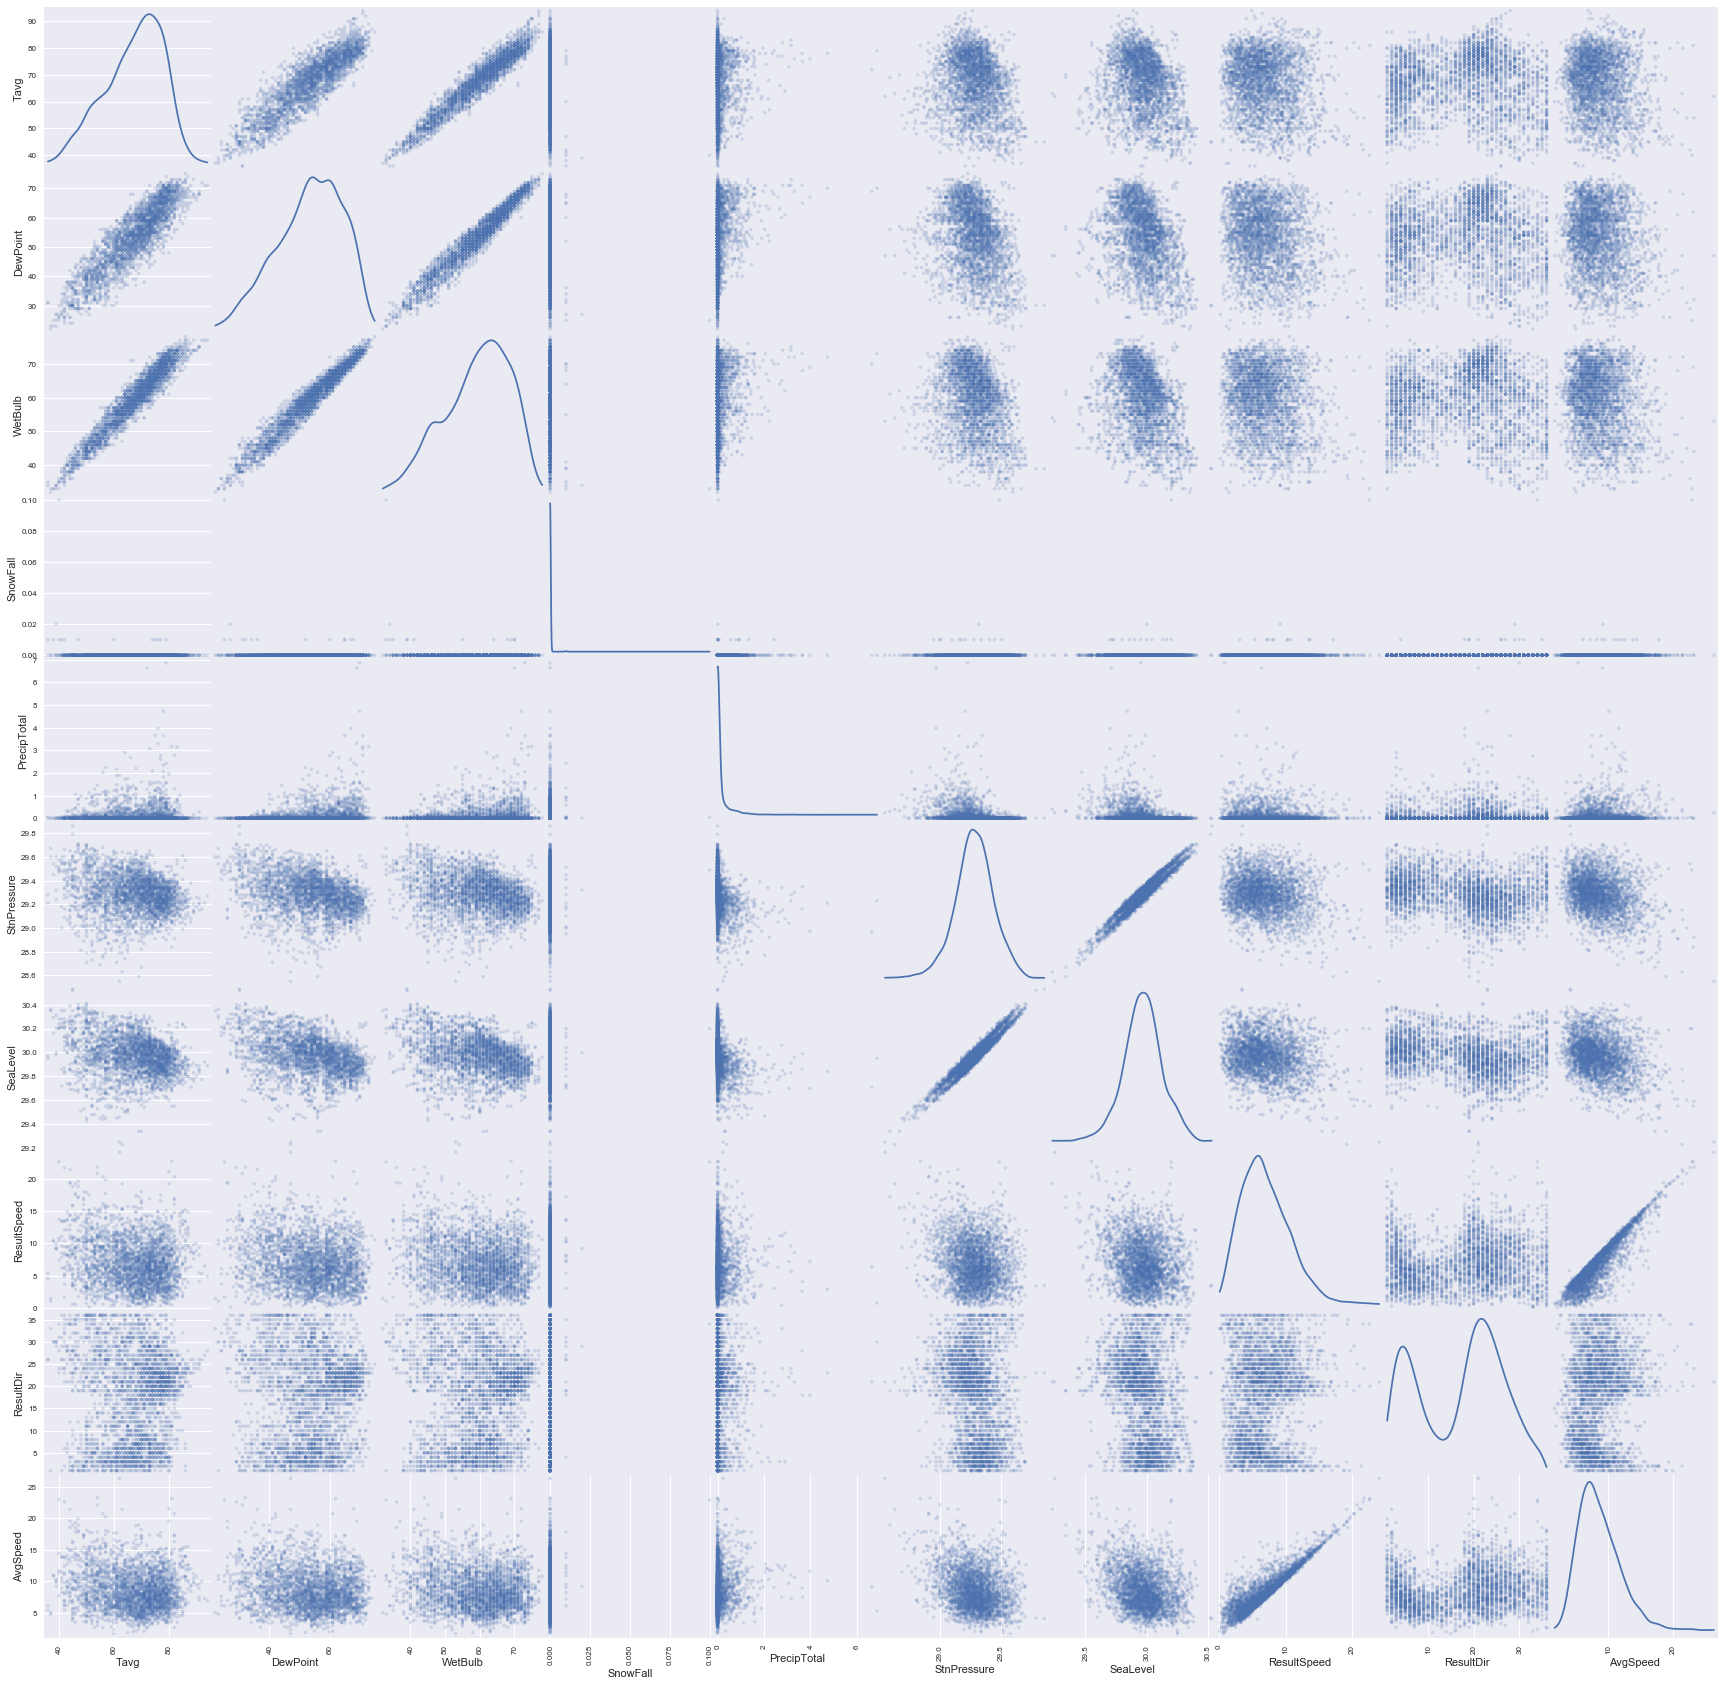

In [59]:
from pandas.plotting import scatter_matrix
df = weather[float_cols[3:-2]]
scatter_matrix(df, alpha=0.2, figsize=(30, 30), diagonal='kde')

So, this is impossible to read; i brought in the input columns in order below. Initial observations:
- Temp, DewPoint, WetBulb all seem to have a similar relationships to Result Speed, SeaLevel, StnPressure? (separately). We'll probably want to do research on how to remove highly correlated values. SME?<br>
- Sea Level and Pressure are correlated. <br>
- ResultSpeed and AvgSpeed; obviously correlated<br>
- Weather data is so weird to interpret on 2d graphs. Looks like a SVM problem.

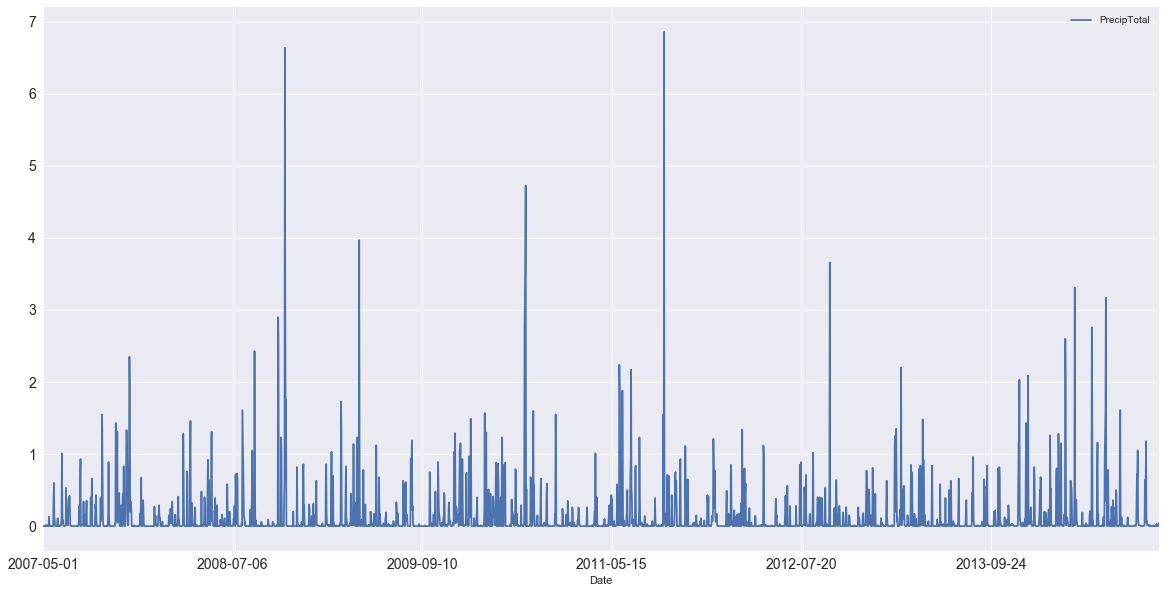

In [65]:
weather.plot("Date", "PrecipTotal", figsize = (20, 10), fontsize = 14)

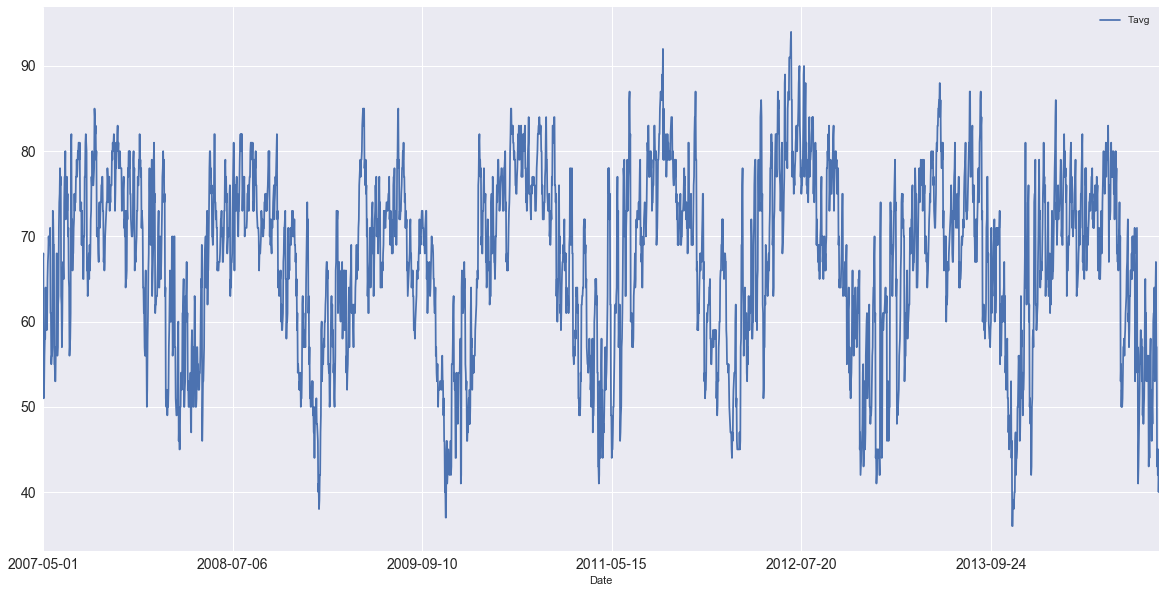

In [72]:
weather.plot("Date", "Tavg", figsize = (20, 10), fontsize = 14)

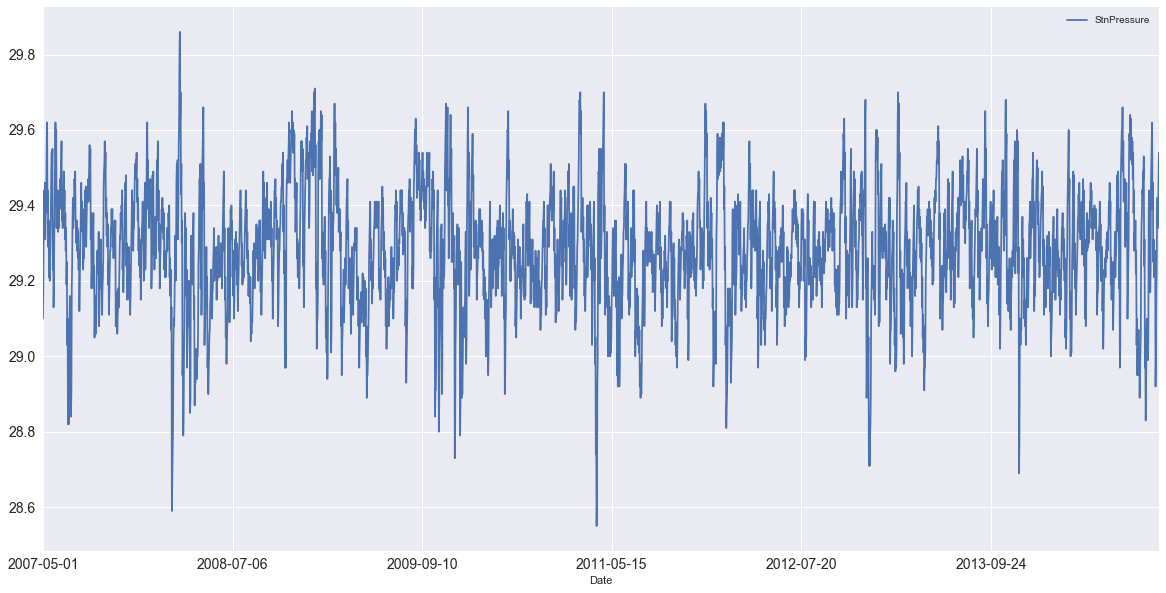

In [70]:
weather.plot("Date", "StnPressure", figsize = (20, 10), fontsize = 14)

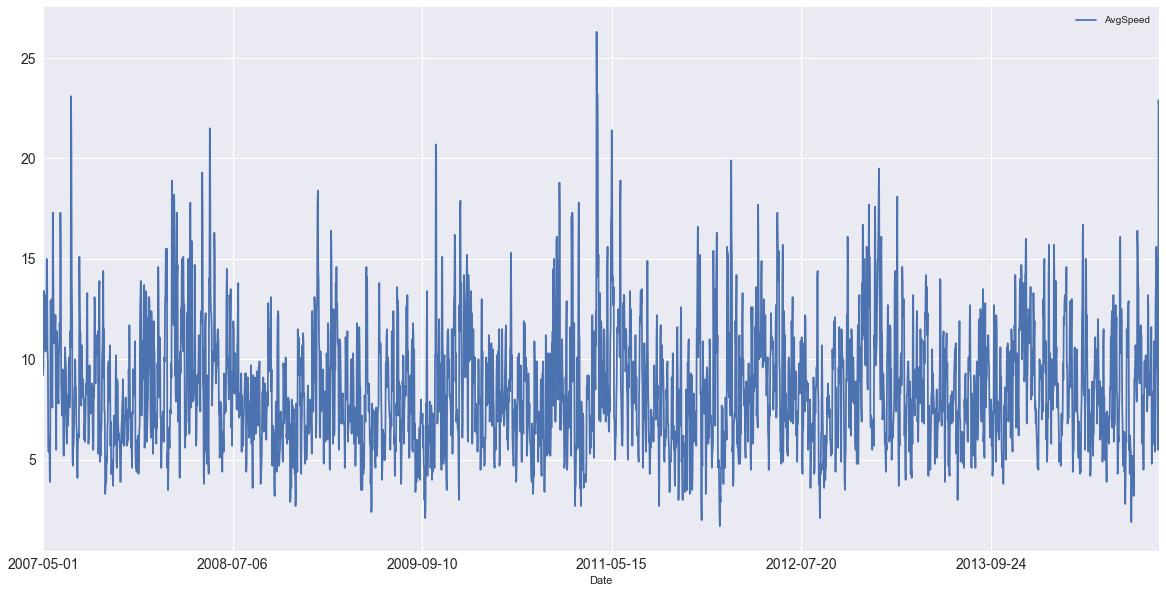

In [71]:
weather.plot("Date", "AvgSpeed", figsize = (20, 10), fontsize = 14)

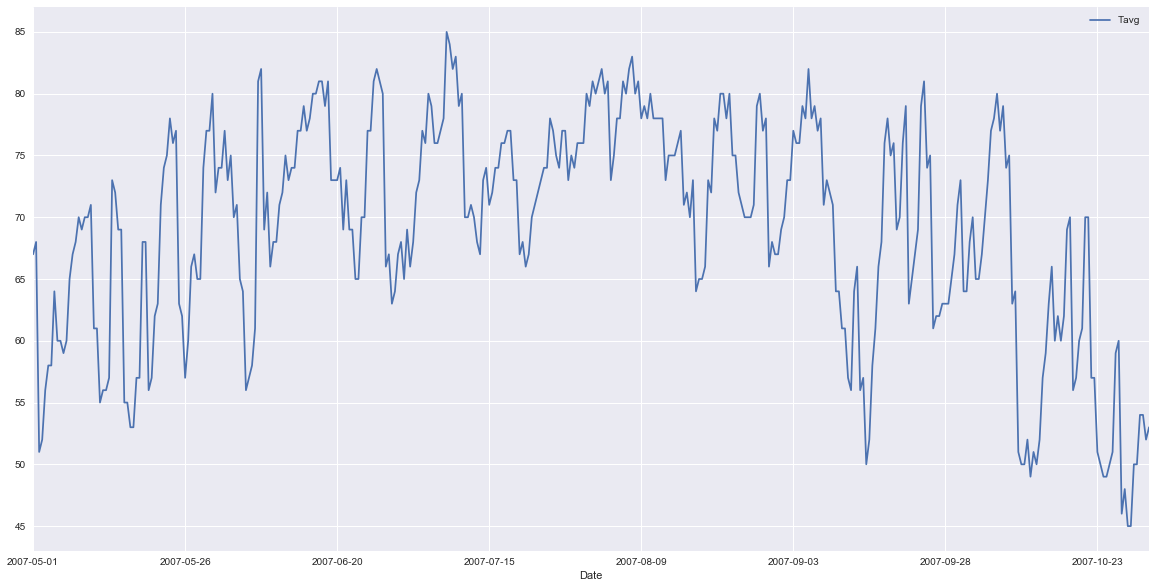

In [80]:
weather.loc[weather["Date"].str.contains("2007"),:].plot("Date","Tavg",figsize=(20,10)) #check out that lake effect.

In [90]:
from datetime import datetime
weather["Date"] = weather.apply(lambda x: datetime.strptime(x["Date"], '%Y-%m-%d'), axis =1)

In [94]:
weather.to_csv('weather-nmo.csv')

How the heck are we going to interpret temperature and spacial data?<br>
Rogers and Randolph (2000) explored similar questions using a multivariate statistical model The present-day distribution of malaria was used to empirically establish how the disease is currently constrained by the mean and covariances of meteorological factors including temperature, precipitation, and atmospheric humidity These statistical relationships were then used to predict potential malaria distribution under future climate change scenarios

Women authored sources:<br>
https://libraries.mit.edu/files/gis/regression_presentation_iap2013.pdf<br>
https://www.youtube.com/watch?v=2u-KFbRX44I<br>
https://www.youtube.com/watch?v=tM41Dxlk_zs

should i download geopy? https://pypi.python.org/pypi/geopy

so i downloaded proj4.. http://www.markhneedham.com/blog/2015/10/05/mac-os-x-installing-the-proj-4-cartographic-projections-library/

https://matplotlib.org/basemap/api/basemap_api.html

/Users/nmolivo/anaconda/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:1767: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  axisbgc = ax.get_axis_bgcolor()
/Users/nmolivo/anaconda/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:1623: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  fill_color = ax.get_axis_bgcolor()
/Users/nmolivo/anaconda/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3260: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/Users/nmolivo/anaconda/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3269: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


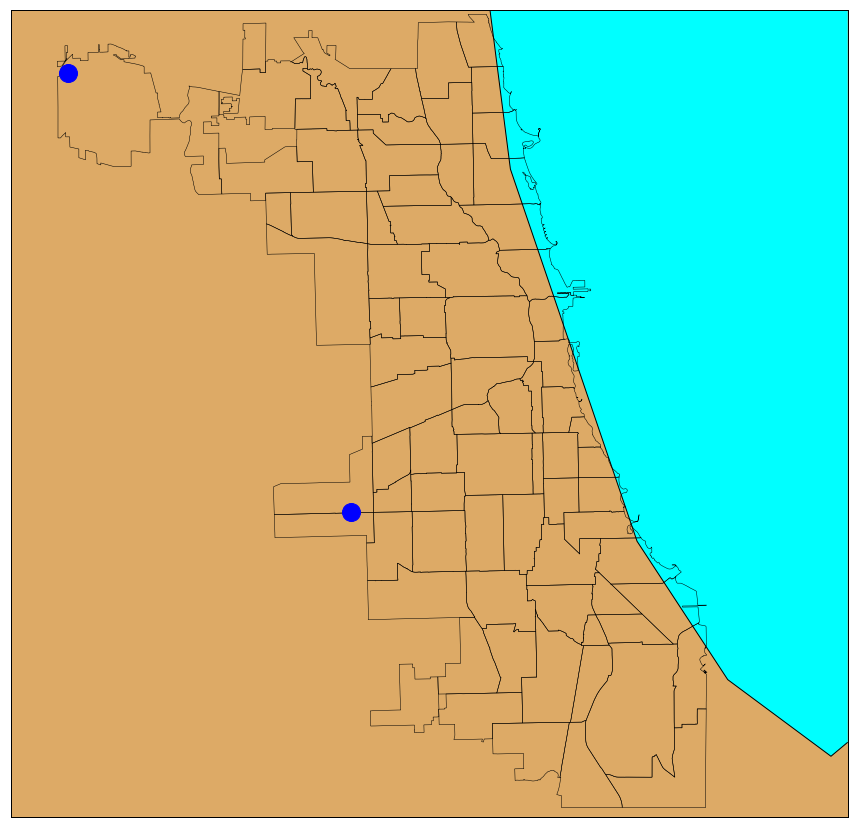

In [21]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 15))
# llcrnrlat,llcrnrlon,urcrnrlat,urcrnrlon
# are the lat/lon values of the lower left and upper right corners
# of the map.
#lower left: 41.639972,-87.9408407
#upper right: 42.025037,-87.4344337

map = Basemap(llcrnrlon=-87.97,llcrnrlat=41.639972,urcrnrlon=-87.434,urcrnrlat=42.025037,
             resolution='i', projection='merc', lat_0 = 39.5, lon_0 = 1)

#resolution of boundary database to use. the higher the res, the longer it takes to plot.
#nmo note: use i. h and f aren't that much better, there are still peices of chicago in the lake
#Can be c (crude), 
#l (low), 
#i (intermediate), 
#h (high), 
#f (full) or 
#None. If None, no boundary data will be read in (and class methods such as drawcoastlines will raise an if invoked)

map.drawmapboundary(fill_color='aqua')
map.fillcontinents(color='#ddaa66',lake_color='aqua')
map.drawcoastlines()
map.drawmapboundary()
lons = [-87.933, -87.752]
lats = [41.995, 41.786]
x,y = map(lons, lats)
map.plot(x, y, 'bo', markersize=18)

map.readshapefile('git-ignore/chicagoshapefile', 'chicagoshapefile')

plt.show()